# MLP
Cell line 03 HepG2

This notebook uses
lncRNA, canonical, no middle-exclusion, GMM, learning module.

There was a learn fail during CV.

MCC mean 0.1609

In [1]:
SEED = 43
import tensorflow as tf
tf.random.set_seed(SEED) 
tf.keras.backend.set_floatx('float32')
import numpy as np
np.random.seed(SEED) 
from datetime import datetime
print(datetime.now())

2023-04-29 17:19:27.924319


In [2]:
import sys
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    print('GPU device not found')
else:
    print('Found GPU at: {}'.format(device_name))

try:
    from google.colab import drive
    IN_COLAB = True
    print('Running on CoLab')
    PATH='/content/drive/'
    drive.mount(PATH)
    DATA_DIR=PATH+'My Drive/data/Localization/TrainTest/TrainTest_ver43/'  # must end in "/"
    MODEL_DIR=PATH+'My Drive/data/Localization/Models/'  # must end in "/"
    sys.path.append('/content/drive/My Drive/Colab Notebooks')
except:
    IN_COLAB = False
    DATA_DIR="/"
    MODEL_DIR="/"
print(DATA_DIR)
SAVE_MODEL_FILENAME = None # 'MLP'
SAVE_DESCRIM_FILENAME = None # 'GMM'
LOAD_MODEL_FILENAME = None # 'MLP.0.0..model'
LOAD_DESCRIM_FILENAME = None # 'GMM.0.0.pickle'

GPU device not found
Running on CoLab
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/


In [3]:
from platform import python_version
print('Python',python_version())
import pandas as pd
import scipy.stats as ss
import pickle
import time # sleep function
from os.path import isfile
from matplotlib import pyplot as plt 
import sklearn   # pip install --upgrade scikit-learn
print('sklearn',sklearn.__version__)

from learning import DataLoader, CrossValidator, Separator, ModelBuilder

K=5
ALPHABET=4**K + 1
EPOCHS=300 
EMBED_DIMEN = 4 # arbitrary hyperparameter
RCI_THRESHOLD_MECHANISM = 'RCI_GMM'  # 'RCI_GMM' 'ZERO' 'THE_MEAN'
RCI_THRESHOLD_VALUE = -1  # use -1 for lncRNA, use 0 for mRNA
BREAK = False   # optionally break after first fold
FILTER_TRAIN        = False
FILTER_TAILS_TRAIN  = False
FILTER_MIDDLE_TRAIN = False
FILTER_TEST         = False
FILTER_TAILS_TEST   = False
FILTER_MIDDLE_TEST  = False
MIDDLE_LOW          = -2   # -2 for lncRNA, -1 for mRNA
MIDDLE_HIGH         = 0    #  0 for lncRNA, +1 for mRNA

REPEATS = 2
FOLDS = 5

Python 3.10.11
sklearn 1.2.2


In [4]:
RCI_FILE_TRAIN = 'train.lncRNA_RCI.all_cell_lines.csv'
RCI_FILE_TEST  = None # 'test.lncRNA_RCI.all_cell_lines.csv'

SEQ_FILE_TRAIN = 'train.canon_lncRNA_transcripts.csv'
SEQ_FILE_TEST  = None # 'test.canon_lncRNA_transcripts.csv'

In [5]:
def get_ordered_list():
    ordered_list = \
    ['A549','H1.hESC','HeLa.S3','HepG2','HT1080',\
      'HUVEC','MCF.7','NCI.H460','NHEK','SK.MEL.5',\
      'SK.N.DZ','SK.N.SH','GM12878','K562','IMR.90']
    return ordered_list
all_cell_lines = get_ordered_list()
EXCLUSIONS = [x for x in range(15) if x!=3]   
print('Exclusions',EXCLUSIONS)

Exclusions [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


2023-04-29 17:19:30.261703
Load RCI from /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/train.lncRNA_RCI.all_cell_lines.csv
Number of RCI values loaded 1516
Num RCI: 1516
Load sequence from /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/train.canon_lncRNA_transcripts.csv
Loaded 1516 sequences.

Training # 1 1
2023-04-29 17:19:35.130652
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.1.validation_genes.txt
Discriminator is GMM
Means [-0.23833368651723177, -3.0288296098625778]
Variances [1.75058563 2.72677713]
Priors [0.58332417 0.41667583]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 760:466 61.99%
Computed class weights: {0: 1.315450643776824, 1: 0.8065789473684211}
Valid 1:0 174:116 60.00%
FIT


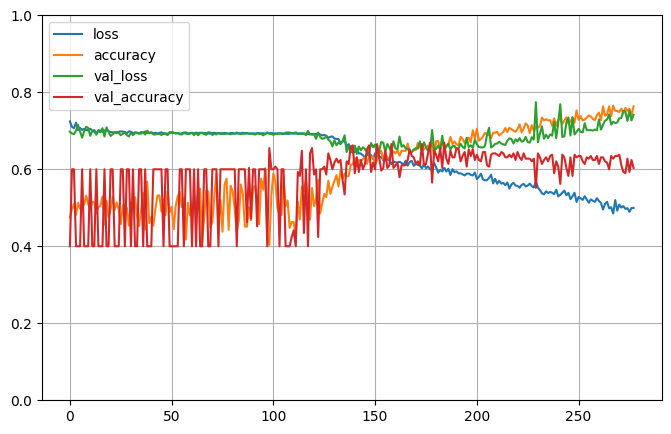


Testing # 1 1
2023-04-29 17:21:01.931372
PREDICT
Test 1:0 174:116 60.00%
Predict 1:0 184:106 63.45%
Test sizes (290, 1025) (290,)
Distrib of scores: 0.5858042 mean 0.18540445 std
Range of scores: 0.15685837 to 0.9443141
Score threshold 0.5
Confusion matrix
 [[ 63  53]
 [ 43 131]]
Normalized matrix
 [[0.21724138 0.18275862]
 [0.14827586 0.45172414]]
Extreme scores correct, pos:neg 79 22
Extreme scores incorrect pos:neg 31 12


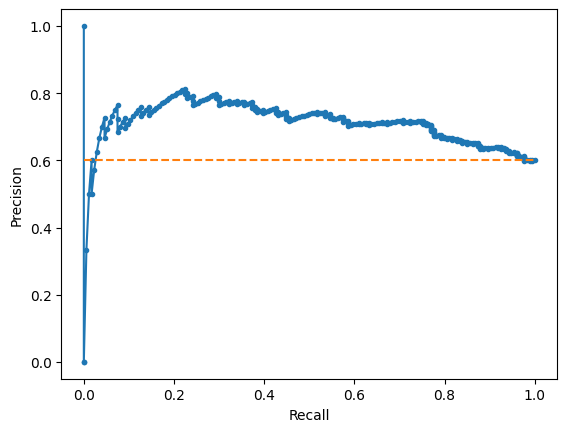

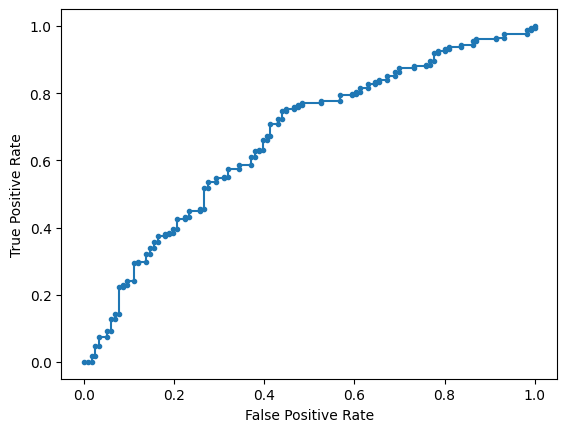

Accuracy: 66.90% Precision: 71.20% Recall: 75.29%
F1: 73.18% MCC: 0.3011
AUPRC: 70.92% AUROC: 66.46%
 accuracy [66.89655172413794]
 precision [71.19565217391305]
 recall [75.28735632183908]
 F1 [73.18435754189944]
 MCC [0.3010923736098176]
 AUPRC [70.91932777018448]
 AUROC [66.45858105430045]

Training # 1 2
2023-04-29 17:21:02.605526
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.2.validation_genes.txt
Discriminator is GMM
Means [-0.30789084430605107, -3.1883434493363105]
Variances [1.65789393 2.48988052]
Priors [0.61291549 0.38708451]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
Train 1:0 781:429 64.55%
Computed class weights: {0: 1.4102564102564104, 1: 0.7746478873239436}
Valid 1:0 190:116 62.09%
FIT


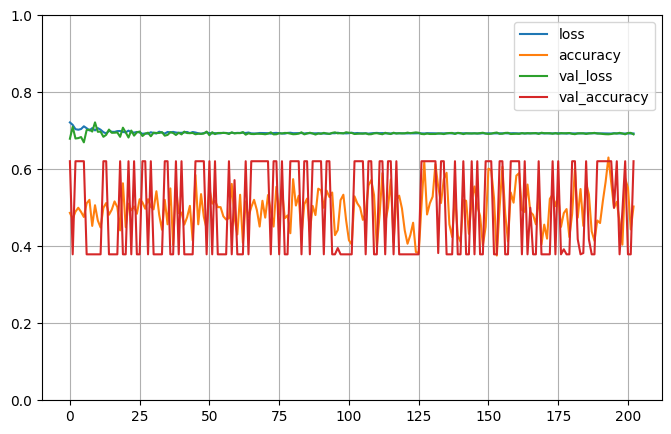


Testing # 1 2
2023-04-29 17:21:52.005655
PREDICT
Test 1:0 190:116 62.09%
Predict 1:0 306:0 100.00%
Test sizes (306, 1025) (306,)
Distrib of scores: 0.5031511 mean 4.9027247e-05 std
Range of scores: 0.50307125 to 0.50334907
Score threshold 0.5
Confusion matrix
 [[  0 116]
 [  0 190]]
Normalized matrix
 [[0.         0.37908497]
 [0.         0.62091503]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


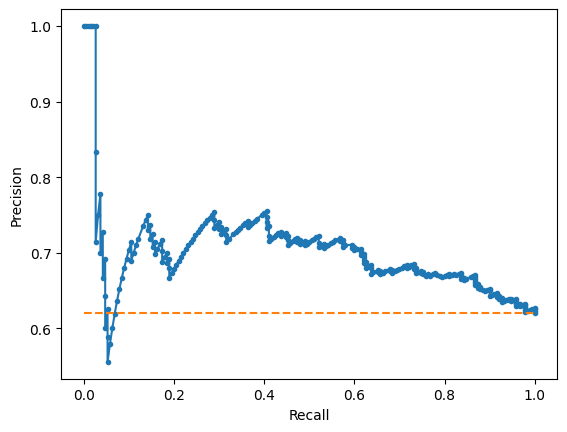

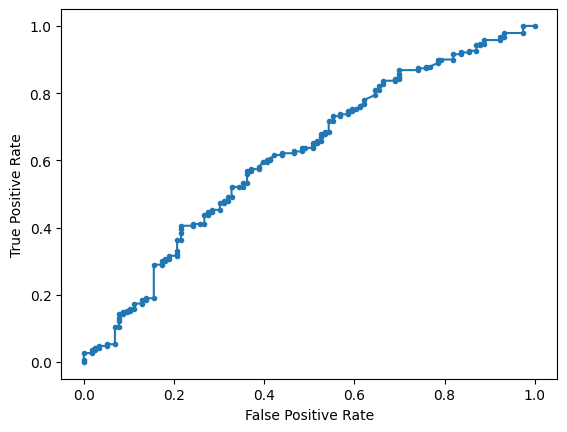

Accuracy: 62.09% Precision: 62.09% Recall: 100.00%
F1: 76.61% MCC: 0.0000
AUPRC: 70.06% AUROC: 61.56%
 accuracy [62.091503267973856]
 precision [62.091503267973856]
 recall [100.0]
 F1 [76.61290322580645]
 MCC [0.0]
 AUPRC [70.05533493843876]
 AUROC [61.558529945553545]

Training # 1 3
2023-04-29 17:21:52.642535
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.3.validation_genes.txt
Discriminator is GMM
Means [-0.1053938176186926, -2.9639098241024535]
Variances [1.65200712 2.58303806]
Priors [0.5442379 0.4557621]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 685:527 56.52%
Computed class weights: {0: 1.1499051233396584, 1: 0.8846715328467153}
Valid 1:0 184:120 60.53%
FIT


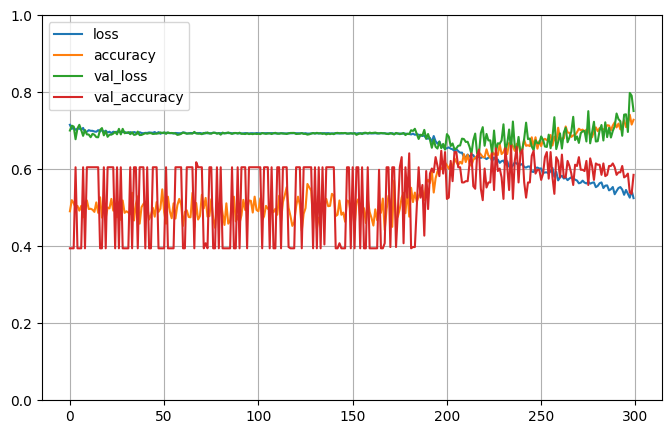


Testing # 1 3
2023-04-29 17:23:20.054574
PREDICT
Test 1:0 184:120 60.53%
Predict 1:0 128:176 42.11%
Test sizes (304, 1025) (304,)
Distrib of scores: 0.45840397 mean 0.21826415 std
Range of scores: 0.021897668 to 0.9854229
Score threshold 0.5
Confusion matrix
 [[85 35]
 [91 93]]
Normalized matrix
 [[0.27960526 0.11513158]
 [0.29934211 0.30592105]]
Extreme scores correct, pos:neg 44 53
Extreme scores incorrect pos:neg 13 56


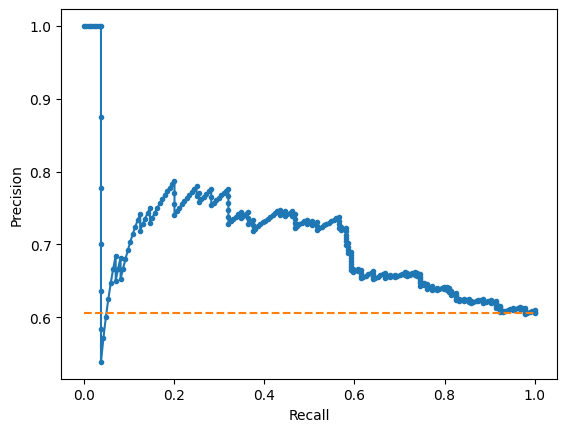

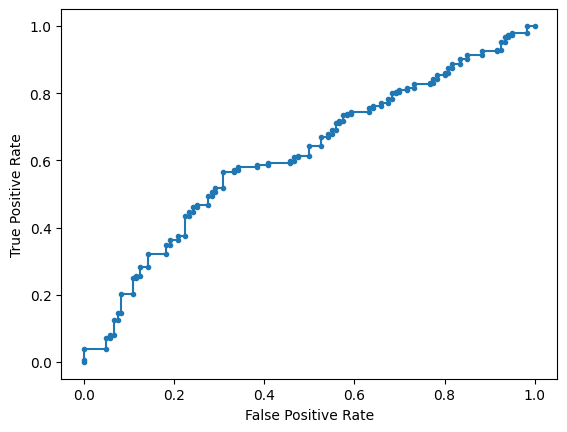

Accuracy: 58.55% Precision: 72.66% Recall: 50.54%
F1: 59.62% MCC: 0.2116
AUPRC: 70.29% AUROC: 61.55%
 accuracy [58.55263157894737]
 precision [72.65625]
 recall [50.54347826086957]
 F1 [59.615384615384606]
 MCC [0.2116319070096913]
 AUPRC [70.2915011638257]
 AUROC [61.54891304347827]

Training # 1 4
2023-04-29 17:23:20.625317
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.4.validation_genes.txt
Discriminator is GMM
Means [-0.18493307737039452, -2.948240897723801]
Variances [1.64240898 2.57573112]
Priors [0.55417743 0.44582257]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 700:513 57.71%
Computed class weights: {0: 1.1822612085769981, 1: 0.8664285714285714}
Valid 1:0 183:120 60.40%
FIT


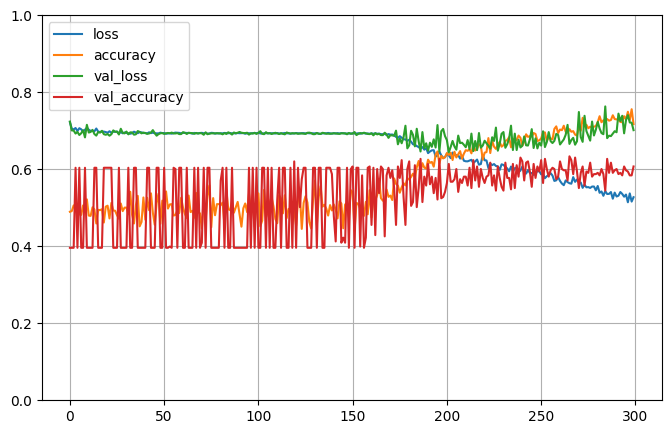


Testing # 1 4
2023-04-29 17:24:33.757566
PREDICT
Test 1:0 183:120 60.40%
Predict 1:0 186:117 61.39%
Test sizes (303, 1025) (303,)
Distrib of scores: 0.56445754 mean 0.23314084 std
Range of scores: 0.033420675 to 0.9676992
Score threshold 0.5
Confusion matrix
 [[ 59  61]
 [ 58 125]]
Normalized matrix
 [[0.19471947 0.20132013]
 [0.19141914 0.41254125]]
Extreme scores correct, pos:neg 91 38
Extreme scores incorrect pos:neg 36 26


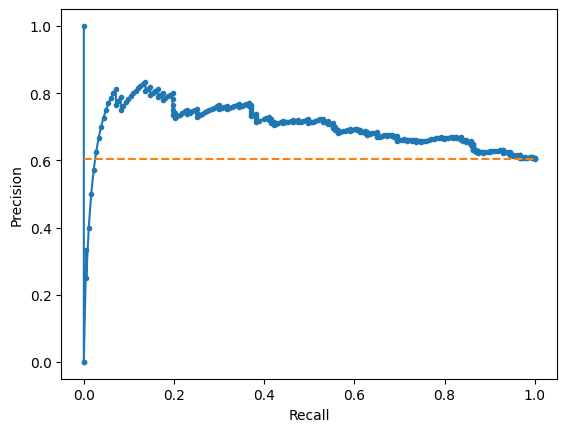

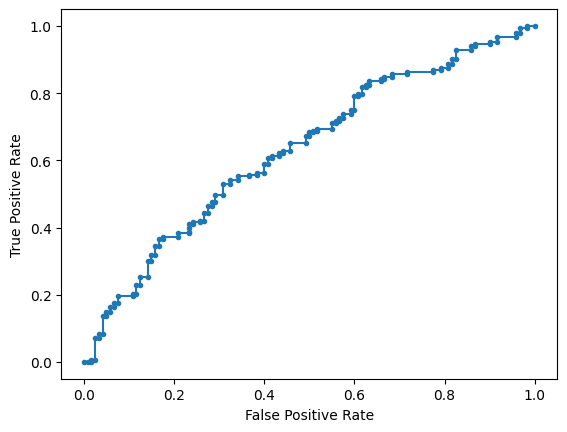

Accuracy: 60.73% Precision: 67.20% Recall: 68.31%
F1: 67.75% MCC: 0.1755
AUPRC: 69.82% AUROC: 63.17%
 accuracy [60.726072607260726]
 precision [67.20430107526882]
 recall [68.30601092896174]
 F1 [67.75067750677508]
 MCC [0.17551984565391554]
 AUPRC [69.8199256656837]
 AUROC [63.17395264116576]

Training # 1 5
2023-04-29 17:24:34.421530
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.5.validation_genes.txt
Discriminator is GMM
Means [-2.947449647749297, -0.20749329426750385]
Variances [2.62620811 1.67915006]
Priors [0.44287987 0.55712013]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 711:492 59.10%
Computed class weights: {0: 1.2225609756097562, 1: 0.8459915611814346}
Valid 1:0 188:125 60.06%
FIT


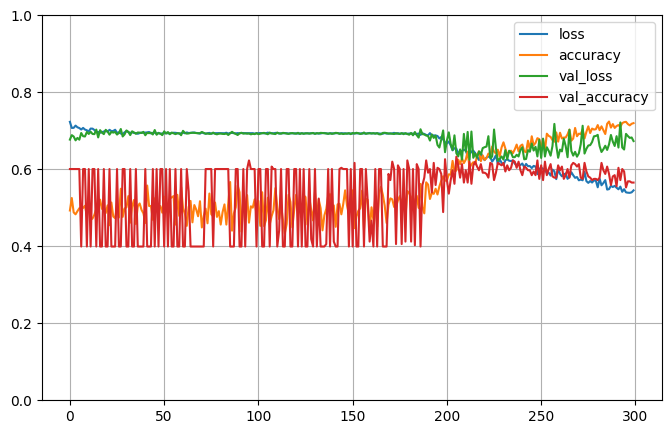


Testing # 1 5
2023-04-29 17:25:45.639581
PREDICT
Test 1:0 188:125 60.06%
Predict 1:0 166:147 53.04%
Test sizes (313, 1025) (313,)
Distrib of scores: 0.52451664 mean 0.21819103 std
Range of scores: 0.032277003 to 0.9640127
Score threshold 0.5
Confusion matrix
 [[ 68  57]
 [ 79 109]]
Normalized matrix
 [[0.2172524  0.18210863]
 [0.25239617 0.34824281]]
Extreme scores correct, pos:neg 70 37
Extreme scores incorrect pos:neg 20 31


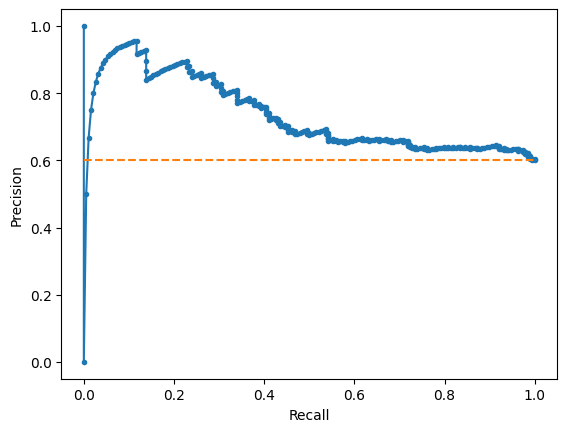

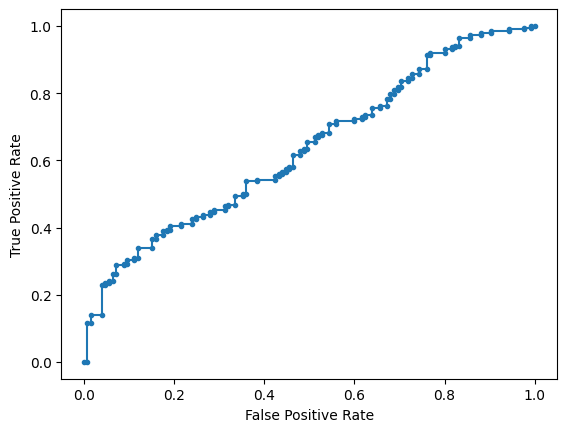

Accuracy: 56.55% Precision: 65.66% Recall: 57.98%
F1: 61.58% MCC: 0.1215
AUPRC: 73.13% AUROC: 63.45%
 accuracy [56.54952076677316]
 precision [65.66265060240963]
 recall [57.97872340425532]
 F1 [61.5819209039548]
 MCC [0.12147784492334475]
 AUPRC [73.13424371477967]
 AUROC [63.446808510638306]

Training # 2 1
2023-04-29 17:25:46.316170
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.1.validation_genes.txt
Discriminator is GMM
Means [-2.9372686312798795, -0.18886574812004764]
Variances [2.60460044 1.67718688]
Priors [0.44319712 0.55680288]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 713:508 58.39%
Computed class weights: {0: 1.2017716535433072, 1: 0.8562412342215989}
Valid 1:0 175:120 59.32%
FIT


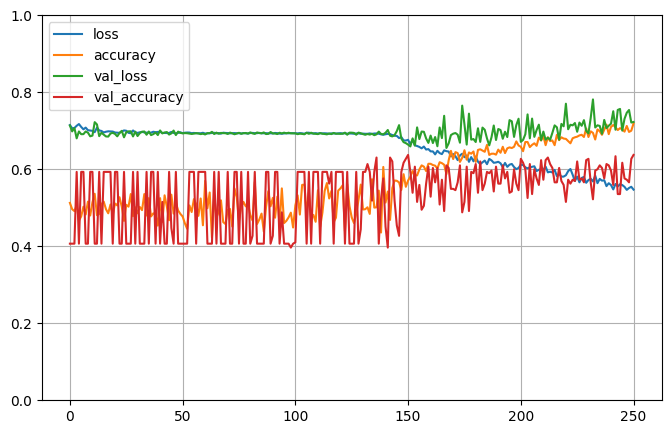


Testing # 2 1
2023-04-29 17:27:11.005287
PREDICT
Test 1:0 175:120 59.32%
Predict 1:0 242:53 82.03%
Test sizes (295, 1025) (295,)
Distrib of scores: 0.5500069 mean 0.05828812 std
Range of scores: 0.44210678 to 0.7346051
Score threshold 0.5
Confusion matrix
 [[ 33  87]
 [ 20 155]]
Normalized matrix
 [[0.11186441 0.29491525]
 [0.06779661 0.52542373]]
Extreme scores correct, pos:neg 18 0
Extreme scores incorrect pos:neg 5 0


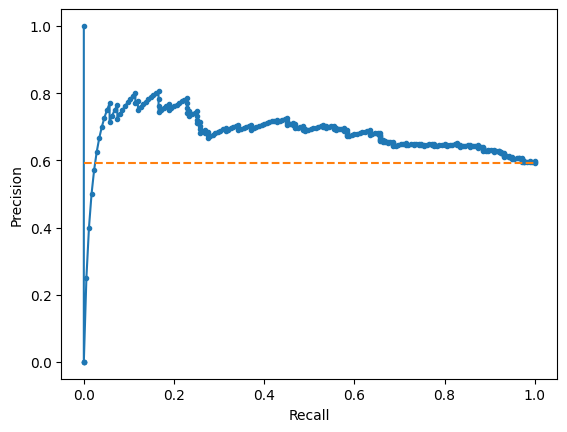

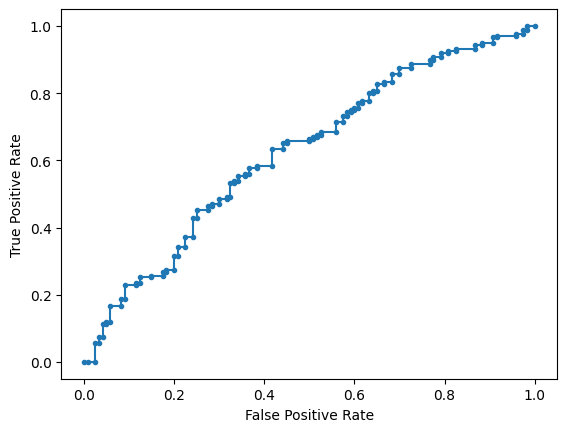

Accuracy: 63.73% Precision: 64.05% Recall: 88.57%
F1: 74.34% MCC: 0.2056
AUPRC: 68.00% AUROC: 62.63%
 accuracy [63.72881355932203]
 precision [64.0495867768595]
 recall [88.57142857142857]
 F1 [74.34052757793765]
 MCC [0.2056451692159083]
 AUPRC [68.00150998819561]
 AUROC [62.63333333333333]

Training # 2 2
2023-04-29 17:27:11.920309
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.2.validation_genes.txt
Discriminator is GMM
Means [-2.9747025553888538, -0.19508673473142293]
Variances [2.66621945 1.67521597]
Priors [0.43496649 0.56503351]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 734:488 60.07%
Computed class weights: {0: 1.2520491803278688, 1: 0.832425068119891}
Valid 1:0 171:123 58.16%
FIT


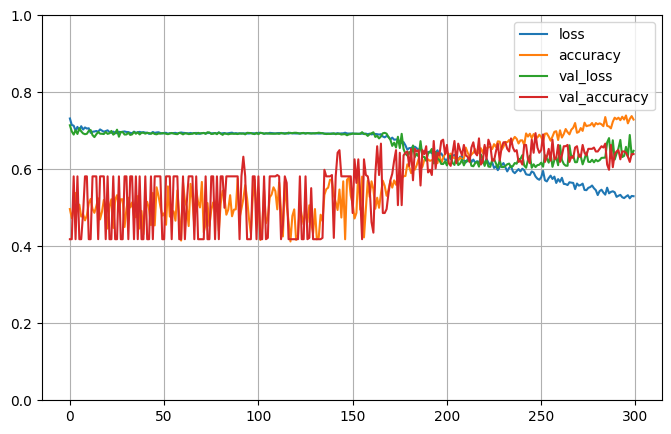


Testing # 2 2
2023-04-29 17:28:26.720602
PREDICT
Test 1:0 171:123 58.16%
Predict 1:0 151:143 51.36%
Test sizes (294, 1025) (294,)
Distrib of scores: 0.5147488 mean 0.24609098 std
Range of scores: 0.02105816 to 0.9717669
Score threshold 0.5
Confusion matrix
 [[ 80  43]
 [ 63 108]]
Normalized matrix
 [[0.27210884 0.1462585 ]
 [0.21428571 0.36734694]]
Extreme scores correct, pos:neg 73 54
Extreme scores incorrect pos:neg 26 34


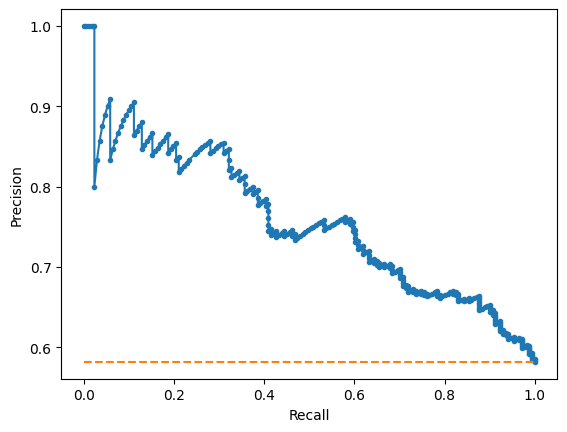

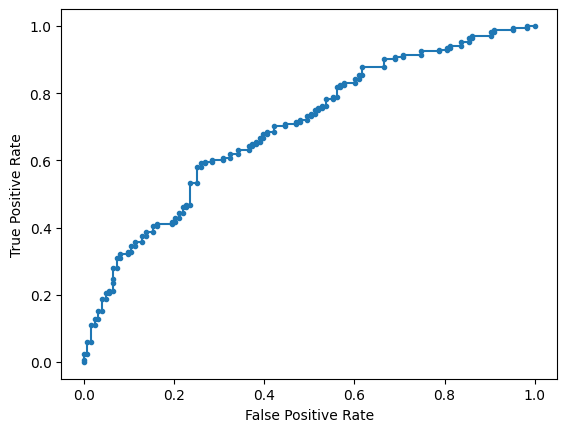

Accuracy: 63.95% Precision: 71.52% Recall: 63.16%
F1: 67.08% MCC: 0.2783
AUPRC: 75.64% AUROC: 69.80%
 accuracy [63.94557823129252]
 precision [71.52317880794702]
 recall [63.1578947368421]
 F1 [67.08074534161491]
 MCC [0.27830487942492893]
 AUPRC [75.63683745931648]
 AUROC [69.79508391575143]

Training # 2 3
2023-04-29 17:28:27.324223
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.3.validation_genes.txt
Discriminator is GMM
Means [-3.12060581580919, -0.21878831001696508]
Variances [2.40286299 1.61363422]
Priors [0.41801134 0.58198866]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 732:473 60.75%
Computed class weights: {0: 1.2737843551797041, 1: 0.8230874316939891}
Valid 1:0 194:117 62.38%
FIT


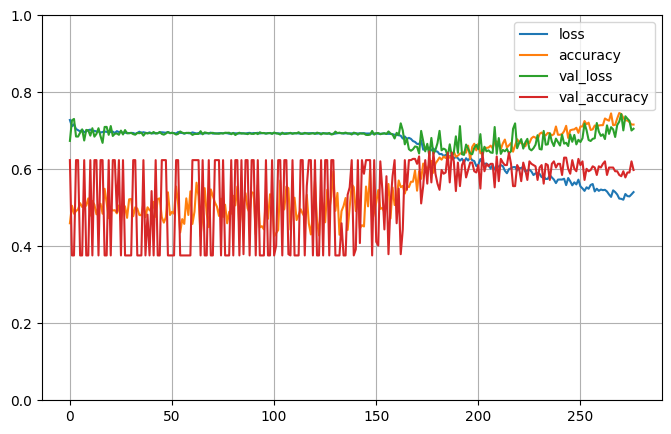


Testing # 2 3
2023-04-29 17:29:51.966348
PREDICT
Test 1:0 194:117 62.38%
Predict 1:0 244:67 78.46%
Test sizes (311, 1025) (311,)
Distrib of scores: 0.58589715 mean 0.10208303 std
Range of scores: 0.36986974 to 0.85437196
Score threshold 0.5
Confusion matrix
 [[ 37  80]
 [ 30 164]]
Normalized matrix
 [[0.11897106 0.25723473]
 [0.09646302 0.52733119]]
Extreme scores correct, pos:neg 65 0
Extreme scores incorrect pos:neg 16 0


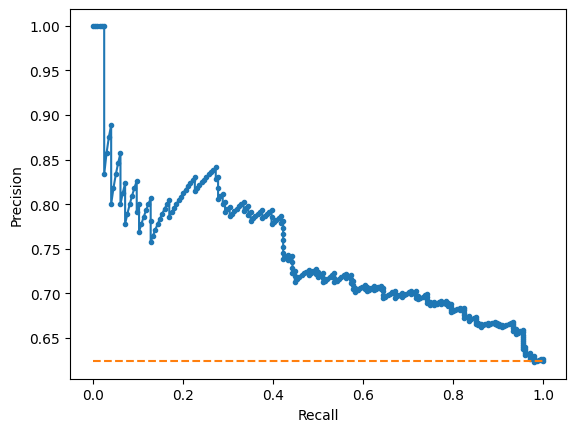

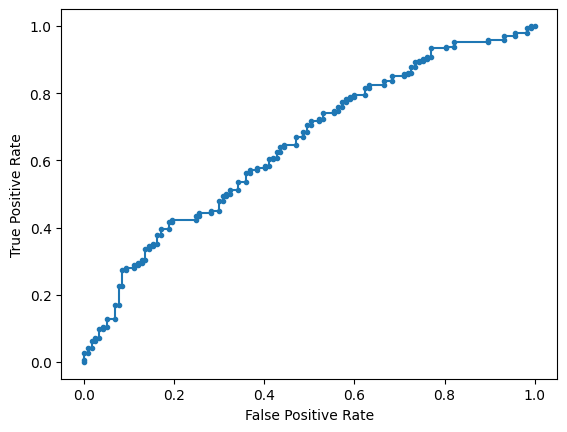

Accuracy: 64.63% Precision: 67.21% Recall: 84.54%
F1: 74.89% MCC: 0.1904
AUPRC: 74.37% AUROC: 64.74%
 accuracy [64.63022508038586]
 precision [67.21311475409836]
 recall [84.5360824742268]
 F1 [74.88584474885845]
 MCC [0.19041590301083203]
 AUPRC [74.3748838055067]
 AUROC [64.73698123182659]

Training # 2 4
2023-04-29 17:29:52.657935
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.4.validation_genes.txt
Discriminator is GMM
Means [-2.976108733798897, -0.2060383472432525]
Variances [2.73583598 1.75797407]
Priors [0.42006292 0.57993708]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 746:468 61.45%
Computed class weights: {0: 1.297008547008547, 1: 0.8136729222520107}
Valid 1:0 175:127 57.95%
FIT


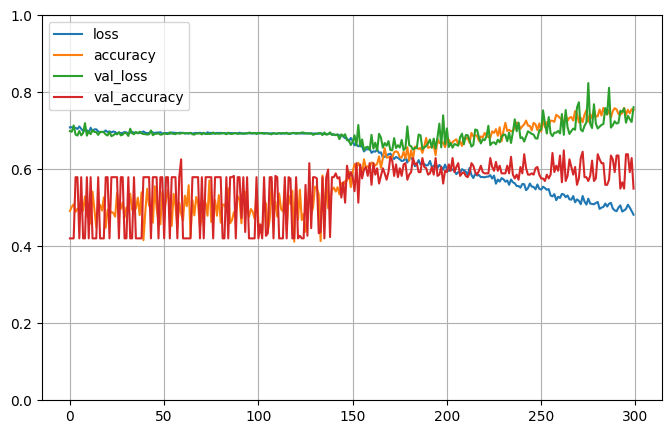


Testing # 2 4
2023-04-29 17:31:16.911795
PREDICT
Test 1:0 175:127 57.95%
Predict 1:0 129:173 42.72%
Test sizes (302, 1025) (302,)
Distrib of scores: 0.4721042 mean 0.26540792 std
Range of scores: 0.013426391 to 0.97931176
Score threshold 0.5
Confusion matrix
 [[82 45]
 [91 84]]
Normalized matrix
 [[0.27152318 0.14900662]
 [0.3013245  0.2781457 ]]
Extreme scores correct, pos:neg 64 65
Extreme scores incorrect pos:neg 24 50


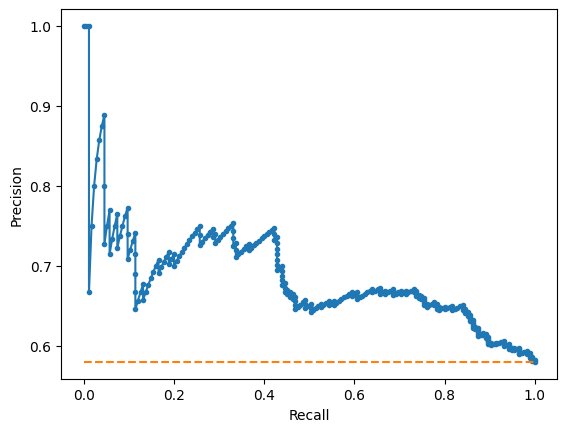

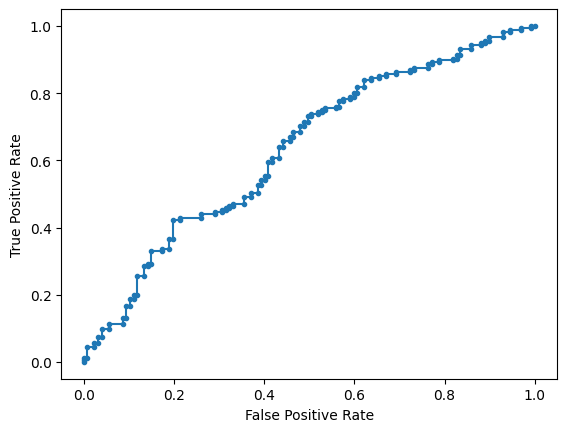

Accuracy: 54.97% Precision: 65.12% Recall: 48.00%
F1: 55.26% MCC: 0.1254
AUPRC: 68.47% AUROC: 63.38%
 accuracy [54.966887417218544]
 precision [65.11627906976744]
 recall [48.0]
 F1 [55.263157894736835]
 MCC [0.12540999316146528]
 AUPRC [68.46839514016528]
 AUROC [63.38357705286839]

Training # 2 5
2023-04-29 17:31:17.569536
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.5.validation_genes.txt
Discriminator is GMM
Means [-3.0259163327554877, -0.2647903751477436]
Variances [2.69694359 1.70984301]
Priors [0.43212229 0.56787771]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 722:480 60.07%
Computed class weights: {0: 1.2520833333333334, 1: 0.832409972299169}
Valid 1:0 201:113 64.01%
FIT


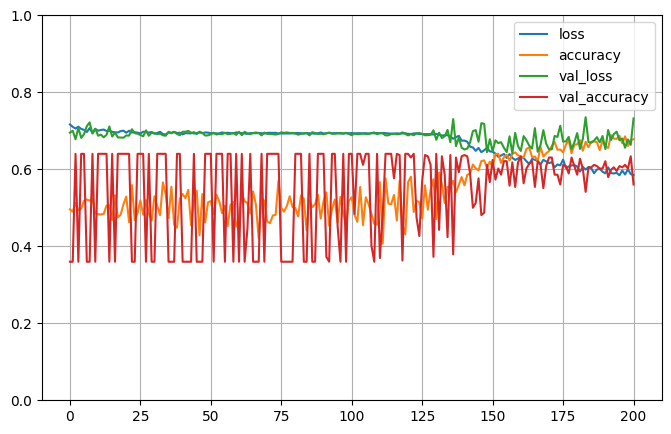


Testing # 2 5
2023-04-29 17:32:10.760201
PREDICT
Test 1:0 201:113 64.01%
Predict 1:0 314:0 100.00%
Test sizes (314, 1025) (314,)
Distrib of scores: 0.50812274 mean 0.0005161475 std
Range of scores: 0.5071077 to 0.5103722
Score threshold 0.5
Confusion matrix
 [[  0 113]
 [  0 201]]
Normalized matrix
 [[0.         0.35987261]
 [0.         0.64012739]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


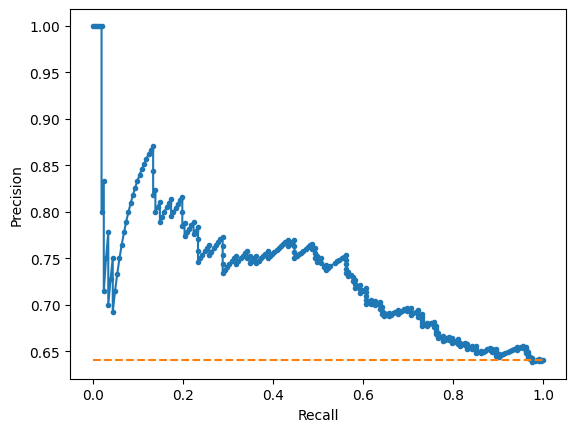

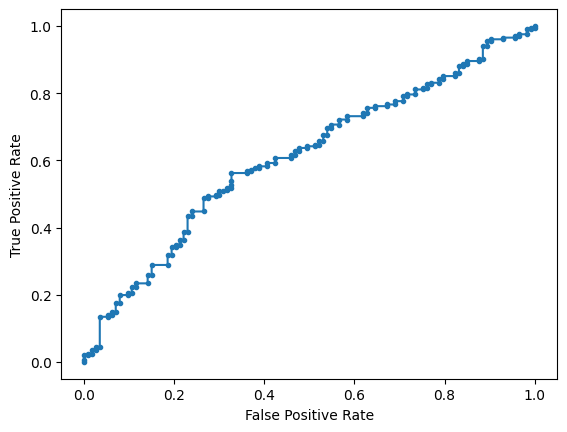

Accuracy: 64.01% Precision: 64.01% Recall: 100.00%
F1: 78.06% MCC: 0.0000
AUPRC: 73.25% AUROC: 61.02%
 accuracy [64.01273885350318]
 precision [64.01273885350318]
 recall [100.0]
 F1 [78.05825242718446]
 MCC [0.0]
 AUPRC [73.2487877442862]
 AUROC [61.02232201822745]
2023-04-29 17:32:11.418980


In [6]:
print(datetime.now())

accuracy=[]
precision=[]
recall=[]
f1=[]
mcc=[]
auprc=[]
auroc=[]

loader = DataLoader(K,ALPHABET)
filepath = DATA_DIR+RCI_FILE_TRAIN
print("Load RCI from",filepath)
gene_to_rci = loader.load_gene_rci_values(filepath,EXCLUSIONS)
print('Num RCI:', len(gene_to_rci.keys()))
filepath = DATA_DIR+SEQ_FILE_TRAIN
print('Load sequence from',filepath)
allids,allseq = loader.load_spectra(filepath)  # for MLP (load_sequence() for CNN)
print('Loaded',len(allseq),'sequences.')
test_gene_to_rci = None
test_allids = None
test_allseq = None
if SEQ_FILE_TEST is not None:
    # Train on the entire train set (no cross-validation).
    # Evaluate with the test files.
    test_loader = DataLoader(K,ALPHABET)
    filepath = DATA_DIR+RCI_FILE_TEST
    print("Load RCI from",filepath)
    test_gene_to_rci = test_loader.load_gene_rci_values(filepath,EXCLUSIONS)
    print('Num RCI:', len(test_gene_to_rci.keys()))
    filepath = DATA_DIR+SEQ_FILE_TEST
    print('Load sequence from',filepath)
    test_allids,test_allseq = test_loader.load_spectra(filepath)
    print('Loaded',len(test_allseq),'sequences.')

for repeat in range(REPEATS):
    for fold in range(FOLDS):
        show_r = repeat+1  # display one-based counting
        show_f = fold+1    # display one-based counting

        print()
        print("Training #",show_r,show_f)
        print(datetime.now())
        builder = ModelBuilder(ALPHABET)
        cvdo = CrossValidator(EPOCHS,RCI_THRESHOLD_VALUE)
        cvdo.set_model_builder(builder)
        cvdo.set_threshold_mechanism(RCI_THRESHOLD_MECHANISM)
        if SEQ_FILE_TEST is None:
            # Train on 80% and evaluate on 20%.
            separator = Separator()
            separator.set_middle(FILTER_TEST,FILTER_TAILS_TEST,FILTER_MIDDLE_TEST,\
                                 FILTER_TRAIN,FILTER_TAILS_TRAIN,FILTER_MIDDLE_TRAIN,\
                                 MIDDLE_LOW,MIDDLE_HIGH)
            separator.load(DATA_DIR,show_r,show_f)
            separator.process(allids,allseq,gene_to_rci)
            train_allids,test_allids = separator.get_ids()
            train_allseq,test_allseq = separator.get_seq()
            train_gene_to_rci,test_gene_to_rci = separator.get_rci()
            cvdo.train_new_model(
                train_allids,train_allseq,train_gene_to_rci,
                test_allids,test_allseq,test_gene_to_rci)
            if SAVE_MODEL_FILENAME is not None:
                filename1 = f"{SAVE_MODEL_FILENAME}.{show_r}.{show_f}.model"
                filename2 = f"{SAVE_DESCRIM_FILENAME}.{show_r}.{show_f}.pickle"
                cvdo.save_model(filename1,filename2)
        else:
            # Train on the entire train set (no cross-validation).
            # Evaluate with the test files.
            train_allids = allids
            train_allseq = allseq
            train_gene_to_rci = gene_to_rci
            BREAK = True
            filename1 = LOAD_MODEL_FILENAME
            filename2 = LOAD_DESCRIM_FILENAME
            cvdo.load_model(filename1,filename2)
            #cvdo.train_new_model(
            #    train_allids,train_allseq,train_gene_to_rci,
            #    None,None,None)

        print()
        print("Testing #",show_r,show_f)
        print(datetime.now())
        cvdo.reset_statistics()
        cvdo.test_without_training(
            test_allids,test_allseq,test_gene_to_rci)
        cv_accuracy,cv_precision,cv_recall,cv_f1,cv_mcc,cv_auprc,cv_auroc=\
            cvdo.get_statistics()

        print(" accuracy" ,  cv_accuracy)
        print(" precision" , cv_precision)
        print(" recall" ,    cv_recall)
        print(" F1" ,        cv_f1)
        print(" MCC" ,       cv_mcc)
        print(" AUPRC" ,     cv_auprc)
        print(" AUROC" ,     cv_auroc)

        accuracy.append(cv_accuracy)
        precision.append(cv_precision)
        recall.append(cv_recall)
        f1.append(cv_f1)
        mcc.append(cv_mcc)
        auprc.append(cv_auprc)
        auroc.append(cv_auroc)
        if BREAK: break
    if BREAK: break
print(datetime.now())

In [7]:
def STD (values):
    # ddof=1 reduces bias when extrapolating from sample to population
    return np.std(values,ddof=1)

print(" accuracy mean %.2f%% std %.2f" %  (np.mean(accuracy),  STD(accuracy)))
print(" precision mean %.2f%% std %.2f" % (np.mean(precision), STD(precision)))
print(" recall mean %.2f%% std %.2f" %    (np.mean(recall),    STD(recall)))
print(" F1 mean %.2f%% std %.2f" %        (np.mean(f1),        STD(f1)))
print(" MCC mean %.4f std %.4f" %       (np.mean(mcc),       STD(mcc)))
print(" AUPRC mean %.2f%% std %.2f" %     (np.mean(auprc),     STD(auprc)))
print(" AUROC mean %.2f%% std %.2f" %     (np.mean(auroc),     STD(auroc)))

print(" accuracy"  , accuracy)
print(" precision" , precision)
print(" recall"    , recall)
print(" F1"        , f1)
print(" MCC"       , mcc)
print(" AUPRC"     , auprc)
print(" AUROC"     , auroc)



 accuracy mean 61.61% std 3.84
 precision mean 67.07% std 3.61
 recall mean 73.64% std 19.17
 F1 mean 68.84% std 7.87
 MCC mean 0.1609 std 0.1020
 AUPRC mean 71.40% std 2.56
 AUROC mean 63.78% std 2.66
 accuracy [[66.89655172413794], [62.091503267973856], [58.55263157894737], [60.726072607260726], [56.54952076677316], [63.72881355932203], [63.94557823129252], [64.63022508038586], [54.966887417218544], [64.01273885350318]]
 precision [[71.19565217391305], [62.091503267973856], [72.65625], [67.20430107526882], [65.66265060240963], [64.0495867768595], [71.52317880794702], [67.21311475409836], [65.11627906976744], [64.01273885350318]]
 recall [[75.28735632183908], [100.0], [50.54347826086957], [68.30601092896174], [57.97872340425532], [88.57142857142857], [63.1578947368421], [84.5360824742268], [48.0], [100.0]]
 F1 [[73.18435754189944], [76.61290322580645], [59.615384615384606], [67.75067750677508], [61.5819209039548], [74.34052757793765], [67.08074534161491], [74.88584474885845], [55.2631